In [17]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ee
from tqdm import tqdm

In [2]:
# Initialize earth engine
ee.Initialize()

In [3]:
# Define POI (coordinates of interest)
POI = ee.Geometry.Point([-60.92069,-34.57511])

In [4]:
# Create a dictionary of image collections (one for every year)
DICT_CHIRPS_01 = {}

for YEAR in range (1981, 2024):
    
    DATE_START = f"{YEAR}-01-01"
    DATE_END = f"{YEAR+1}-01-01"

    DICT_CHIRPS_01[f"{YEAR}"] = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY") \
                        .filterBounds(POI) \
                        .filterDate(DATE_START, DATE_END)
DICT_CHIRPS_01

{'1981': <ee.imagecollection.ImageCollection at 0x1d698337590>,
 '1982': <ee.imagecollection.ImageCollection at 0x1d698337150>,
 '1983': <ee.imagecollection.ImageCollection at 0x1d698335f50>,
 '1984': <ee.imagecollection.ImageCollection at 0x1d698336450>,
 '1985': <ee.imagecollection.ImageCollection at 0x1d698335fd0>,
 '1986': <ee.imagecollection.ImageCollection at 0x1d6983373d0>,
 '1987': <ee.imagecollection.ImageCollection at 0x1d698334910>,
 '1988': <ee.imagecollection.ImageCollection at 0x1d6983343d0>,
 '1989': <ee.imagecollection.ImageCollection at 0x1d69832bf90>,
 '1990': <ee.imagecollection.ImageCollection at 0x1d69832ba50>,
 '1991': <ee.imagecollection.ImageCollection at 0x1d69832b3d0>,
 '1992': <ee.imagecollection.ImageCollection at 0x1d69832aed0>,
 '1993': <ee.imagecollection.ImageCollection at 0x1d69832a590>,
 '1994': <ee.imagecollection.ImageCollection at 0x1d69832a4d0>,
 '1995': <ee.imagecollection.ImageCollection at 0x1d698329ed0>,
 '1996': <ee.imagecollection.ImageCollec

In [5]:
DICT_CHIRPS_01["1981"]

In [6]:
# Store daily precipitation for each year
DICT_CHIRPS_02 = {}

# Get spatial resolution
OS = DICT_CHIRPS_01["1981"].first().projection().nominalScale().getInfo()

for k, IC in tqdm(DICT_CHIRPS_01.items()):
    
    # Compute daily ppt on every image
    _ = IC.map(lambda image: image.set('precipitation',\
                                                   image.reduceRegion(reducer=ee.Reducer.mean(), geometry=POI, scale=OS)\
                                                   .get('precipitation')
                                                   ))

    # Daily ppt to list
    P_L = _.aggregate_array('precipitation').getInfo()

    DICT_CHIRPS_02[f"{k}"] = P_L

DICT_CHIRPS_02

100%|██████████| 43/43 [01:26<00:00,  2.01s/it]


{'1981': [0,
  0,
  0,
  0,
  2.3668887615203857,
  20.614042282104492,
  0,
  0.48958349227905273,
  0,
  2.8859658241271973,
  16.856657028198242,
  0,
  0,
  0,
  0,
  11.942059516906738,
  0,
  27.296138763427734,
  59.71030044555664,
  0,
  0,
  0,
  0,
  0,
  18.37911605834961,
  24.61463165283203,
  0,
  0,
  0,
  0,
  43.07560348510742,
  0,
  0,
  0,
  18.450532913208008,
  0,
  0,
  0,
  48.30381774902344,
  0,
  0,
  5.054222106933594,
  40.50027847290039,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2.166853666305542,
  0,
  0,
  0,
  1.054673194885254,
  0,
  0,
  0,
  29.157175064086914,
  0,
  0,
  0,
  4.005228042602539,
  4.726169109344482,
  0,
  0,
  0,
  5.355401039123535,
  0,
  23.12371063232422,
  37.48781204223633,
  0,
  0,
  0,
  12.912103652954102,
  0,
  0,
  0,
  0,
  1.1118608713150024,
  0,
  0,
  0,
  0,
  37.70461654663086,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  16.39855194091797,
  25.266605377197266,
  0,
  13.163707733154297,
  5.087073802947998,
  9

In [7]:
# Turn each list into a dataframe
DICT_CHIRPS_03 = {}

for k, L in DICT_CHIRPS_02.items():
    
    DICT_CHIRPS_03[f"{k}"] = pd.DataFrame(data={"PPT" : L})

    # Calculate cumultive PPT
    DICT_CHIRPS_03[f"{k}"]["CUM"] = DICT_CHIRPS_03[f"{k}"]["PPT"].cumsum()

DICT_CHIRPS_03

{'1981':            PPT          CUM
 0     0.000000     0.000000
 1     0.000000     0.000000
 2     0.000000     0.000000
 3     0.000000     0.000000
 4     2.366889     2.366889
 ..         ...          ...
 360   0.000000  1072.124219
 361   5.957735  1078.081953
 362   0.000000  1078.081953
 363  17.873203  1095.955157
 364   0.000000  1095.955157
 
 [365 rows x 2 columns],
 '1982':            PPT         CUM
 0     0.000000    0.000000
 1     0.000000    0.000000
 2     0.000000    0.000000
 3    12.742195   12.742195
 4     0.000000   12.742195
 ..         ...         ...
 360   0.000000  986.815477
 361   0.000000  986.815477
 362   0.000000  986.815477
 363  11.767685  998.583162
 364   0.000000  998.583162
 
 [365 rows x 2 columns],
 '1983':            PPT         CUM
 0     0.000000    0.000000
 1     3.973048    3.973048
 2     8.557336   12.530384
 3     9.779812   22.310196
 4     0.000000   22.310196
 ..         ...         ...
 360   0.000000  915.621196
 361   0.00000

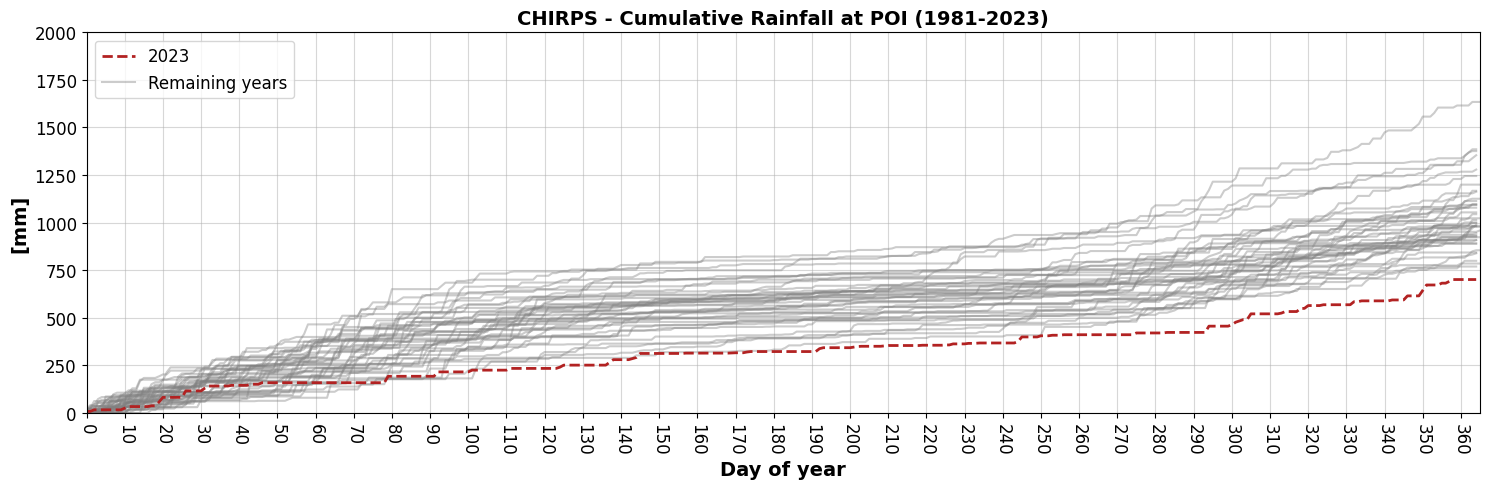

In [8]:
# Plot cumulative precipitation of every year
fig, ax = plt.subplots(figsize=(15, 5))


for k, DF in DICT_CHIRPS_03.items():

    if k != "2023":

        ax.plot(DF["CUM"], c="gray", alpha=.4)

    else:
        
        ax.plot(DF["CUM"], c="firebrick", linewidth=2, linestyle="dashed", label="2023")

ax.set_title("CHIRPS - Cumulative Rainfall at POI (1981-2023)", fontweight="bold", fontsize=14)
ax.set_ylabel("[mm]", fontweight="bold", fontsize=14)
ax.set_xlabel("Day of year", fontweight="bold", fontsize=14)

ax.grid(alpha=.5)

ax.set_ylim(0, 2000)
ax.set_xlim(0, 365)
ax.set_xticks(range(0, 360+10, 10))
ax.tick_params(which="both", labelsize=12)
ax.tick_params(axis='x', rotation=-90)


_, = plt.plot([], [], label="Remaining years", linestyle='-', color='gray', alpha=.4)
plt.legend(handles=[_], loc="upper left")
ax.legend(loc="upper left", fontsize=12)


fig.tight_layout()
plt.show();

In [10]:
# Calculate mean cumulated ppt

# Empty list where yearly rainfall will be appended.
CUM = []

for k, DF in DICT_CHIRPS_03.items():
    
    CUM.append(DF["CUM"].iloc[-1])

CUM

[1095.9551565349102,
 998.5831623077393,
 988.9583461284637,
 1023.0001425743103,
 945.2206925749779,
 980.6184618473053,
 1095.5776588916779,
 785.2216696739197,
 843.1981112360954,
 1078.605643749237,
 1014.0856862068176,
 855.0231513381004,
 1245.0922487825155,
 799.500544667244,
 923.690376996994,
 923.6693861484528,
 907.6487111449242,
 1000.8022027015686,
 931.2872760295868,
 1125.7125200033188,
 1385.4458255767822,
 1376.1188943386078,
 1054.0191974639893,
 977.9690167307854,
 933.680295586586,
 1167.4512969255447,
 1093.299562573433,
 959.0494701266289,
 1113.5569016337395,
 891.4620518684387,
 888.873406291008,
 1634.2992768287659,
 838.7873800992966,
 1354.2405191659927,
 1162.2054506540298,
 1199.7197766304016,
 1278.9685508608818,
 1044.495726963047,
 983.0414849840421,
 982.7850127195343,
 769.448327422142,
 909.0620942876994,
 701.1309836506844]

In [30]:
print(f"""1981-2023 Mean annaul rainfall at POI is: {np.mean(CUM):.1f} mm
2023 annual rainfall at POI was: {DICT_CHIRPS_03['2023']['CUM'].iloc[-1]:.1f} mm
""")

1981-2023 Mean annaul rainfall at POI is: 1029.3 mm
2023 annual rainfall at POI was: 701.1 mm

